# Цели проекта
Провести разведывательный анализ данных и составить отчёт по его результатам.
## Задание
Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.csv')

In [2]:
# знакомимся с датасетом
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [3]:
# переименуем колонки для удобного анализа
stud.rename(columns={'Pstatus':'pstatus', 'Medu': 'medu', 
                      'Fedu': 'fedu', 'Mjob': 'mjob', 
                     'Fjob': 'fjob', 'studytime, granular': 'granular'}, inplace=True)

### План анализа
1. Провести анализ данных по каждой колонке.
   - Определить по каждой колонке распределение значений.
   - Выявить выбросы.
   - Выявить пропуски.
   - Провести замену.
  
  
2. Провести корреляционный анализ количественных показателей.
   - Сделать предварителбные выводы.
   
   
3. Провести статистический анализ о распределении баллов по каждому признаку номинативных показателей.
   - Сделать предварительные выводы.
   
   
4. Отчет о проведенном анализе и рекомендации о дальнейшей работе

88.35 % учащихся в школе с аббревиатурой GP


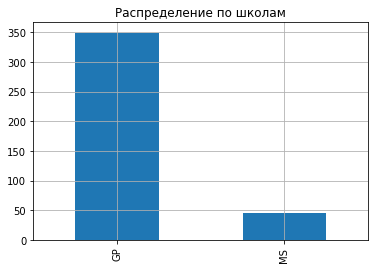

In [4]:
# анализируем данные по школе
stud.school.value_counts().plot(kind='bar', grid=True, title='Распределение по школам')
school=round(stud.school.value_counts()[0]/stud.school.count()*100,2)

print('{} % учащихся в школе с аббревиатурой'.format(school), stud.school.value_counts().index[0])

Соотношение учащихся мужского и женского пола практически одинаковое


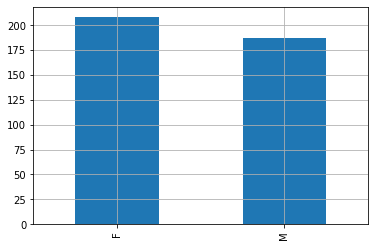

In [5]:
stud.sex.value_counts().plot(kind='bar', grid=True)
print('Соотношение учащихся мужского и женского пола практически одинаковое')

In [6]:
# анализируем данные по возрасту учащихся
stud.age.value_counts()

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

Из предварительного анализа видно, что учащихся после 20 лет крайне мало.
При этом они остаются в датасете, поскольку подподают под условия отбора из задания.


count    395.000000
mean      16.696203
std        1.276043
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

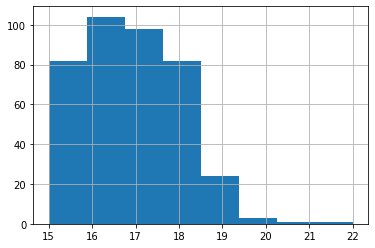

In [7]:
print('''Из предварительного анализа видно, что учащихся после 20 лет крайне мало.
При этом они остаются в датасете, поскольку подподают под условия отбора из задания.''')
stud.age.hist(bins=8, grid=True)
stud.age.describe()

Большинство учащихся проживают в городе


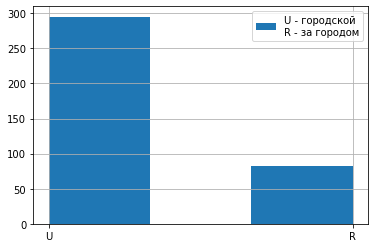

In [8]:
# анализируем данные по типу адреса учащихся
print('Большинство учащихся проживают в городе')
stud.address.hist(bins=3)
plt.legend({'U - городской\nR - за городом'})

In [9]:
count_empty=len(stud.address[stud.address.isna()==True])
print('В данной колонке {} пустых значений'.format(count_empty))

В данной колонке 17 пустых значений


Так как правильных значений всего два, а пустые строки распределены произвольно по всей колонке, заполняем пропуски по аналогии с предшествующими значениями, чтобы максимально приблизить результат к реальным данным.

In [10]:
stud.address.ffill(inplace=True)
stud.address.value_counts()

U    304
R     91
Name: address, dtype: int64

Большая часть учащихся проживает в семье, где больше 3 человек


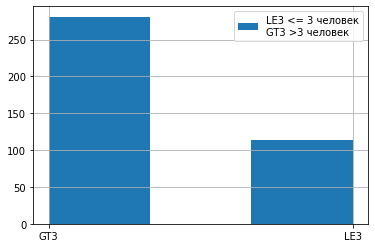

In [17]:
# анализируем данные по размеру семьи учащихся
print('Большая часть учащихся проживает в семье, где больше 3 человек')
stud.famsize.hist(bins=3)
plt.legend({'LE3 <= 3 человек\nGT3 >3 человек'})

In [12]:
empty_fs=len(stud.famsize[stud.famsize.isna()==True])
print('В данной колонке {} пустых значений'.format(empty_fs))

В данной колонке 27 пустых значений


In [13]:
# пустые значения заполняем по аналогии с последующими значениями
stud.famsize.fillna(method='backfill', inplace=True)
stud.famsize.value_counts()

GT3    281
LE3    114
Name: famsize, dtype: int64

In [14]:
# анализируем данные по статусу совместного жилья родителей
stud.pstatus.value_counts()

T    314
A     36
Name: pstatus, dtype: int64

У большинства учащихся родители проживают совместно


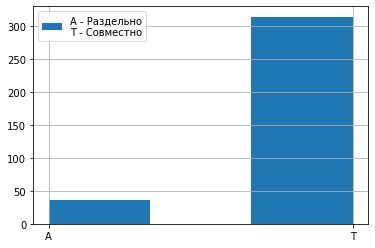

In [15]:
stud.pstatus.hist(bins=3)
plt.legend({'''A - Раздельно\nT - Совместно'''})
print('У большинства учащихся родители проживают совместно')

In [18]:
empty_ps=len(stud.pstatus[stud.pstatus.isna()==True])
print('В данной колонке {} пустых значений'.format(empty_ps))

В данной колонке 45 пустых значений


In [19]:
# пустые значения заполняем по аналогии с предшествующими значениями
stud.pstatus.ffill(inplace=True)
stud.pstatus.value_counts()

T    353
A     42
Name: pstatus, dtype: int64

count    392.000000
mean       2.750000
std        1.098127
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

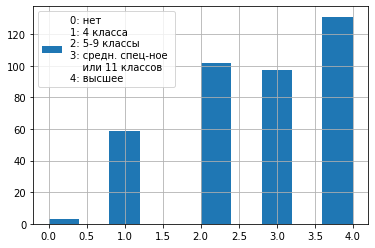

In [20]:
# проверяем данные по уровню образования матери
stud.medu.hist()
plt.legend({'''0: нет 
1: 4 класса
2: 5-9 классы 
3: средн. спец-ное 
    или 11 классов
4: высшее'''}, loc=2)
stud.medu.describe()

In [21]:
# проверяем данные на пустые значения
empty_m=len(stud.medu[stud.medu.isna()==True])
print('В данной колонке {} пустых значения'.format(empty_m))

В данной колонке 3 пустых значения


In [22]:
# так как это не реальные числовые значения, а категориальные данные,
# заполним пустые значения по моде
stud.medu.fillna(4, inplace=True)
stud.pstatus.value_counts()

T    353
A     42
Name: pstatus, dtype: int64

count    395.000000
mean       2.759494
std        1.099321
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: medu, dtype: float64

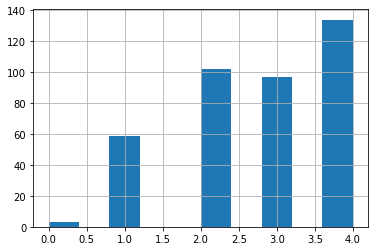

In [23]:
# проверяем как поменялись данные после заполнения
# как видно по описанию, незначительно увеличился показатель среднего значения
stud.medu.hist()
stud.medu.describe()

In [24]:
# проверяем данные по колонке образования отца
stud.fedu.value_counts()

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: fedu, dtype: int64

В данной колонке присутствует выброс по одной строке, где указано значение 40 (когда возможные значения могут быть только от 0 до 4). Наиболее вероятно что это опечатка, и фактическое значение 4, поэтому проведем замену.

In [25]:
stud.fedu[stud.fedu==40]=4
stud.fedu.value_counts()

<ipython-input-25-6b09ea939c68>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.fedu[stud.fedu==40]=4


2.0    106
3.0     96
4.0     89
1.0     78
0.0      2
Name: fedu, dtype: int64

count    371.000000
mean       2.517520
std        1.088808
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

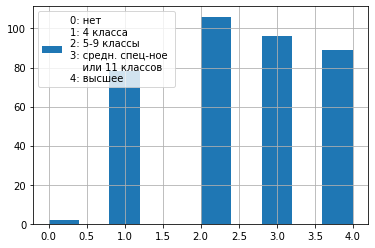

In [26]:
stud.fedu.hist(grid=True)
plt.legend({'''0: нет
1: 4 класса
2: 5-9 классы 
3: средн. спец-ное 
    или 11 классов
4: высшее'''}, loc=2)
stud.fedu.describe()

In [27]:
# проверяем данные на пустые значения
empty_f=len(stud.fedu[stud.fedu.isna()==True])
print('В данной колонке {} пустых значения'.format(empty_f))

В данной колонке 24 пустых значения


count    395.000000
mean       2.486076
std        1.062362
min        0.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        4.000000
Name: fedu, dtype: float64

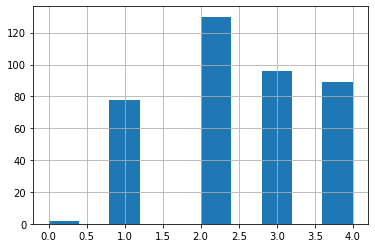

In [28]:
# так как вероятнее всего пустые значения попадут в середину списка
# попробуем в данном случае использовать медиану для замены
mediana=stud.fedu.median()
stud.fedu.fillna(mediana, inplace=True)
stud.fedu.hist()
stud.fedu.describe()

In [29]:
# анализируем данные в колонке "работа матери"
stud.mjob.value_counts()

other       133
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

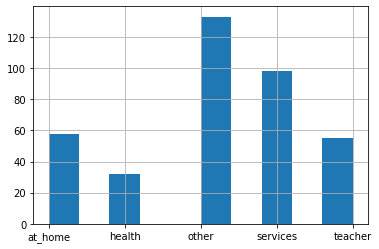

In [30]:
stud.mjob.hist()

In [31]:
# проверяем данные на пустые значения
empty_mj=len(stud.mjob[stud.mjob.isna()==True])
print('В данной колонке {} пустых значений'.format(empty_mj))

В данной колонке 19 пустых значений


Так как вероятность поподания неуказанной профессии в категорию 'other' значительно выше, чем в другие профессии, заполняем значением 'other' все пустые поля

In [32]:
stud.mjob.fillna('other', inplace=True)
stud.mjob.value_counts()

other       152
services     98
at_home      58
teacher      55
health       32
Name: mjob, dtype: int64

In [33]:
# анализируем данные в колонке "работа отца"
stud.fjob.value_counts()

other       197
services    102
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

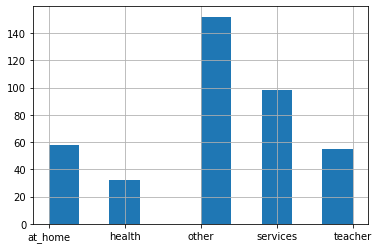

In [34]:
stud.mjob.hist()

In [35]:
# проверяем данные на пустые значения
empty_fj=len(stud.fjob[stud.fjob.isna()==True])
print('В данной колонке {} пустых значений'.format(empty_fj))

В данной колонке 36 пустых значений


In [36]:
# пустые значения заполняем 'other'
stud.fjob.fillna('other', inplace=True)
stud.fjob.value_counts()

other       233
services    102
teacher      29
at_home      16
health       15
Name: fjob, dtype: int64

In [37]:
# анализируем колонку причины выбора школы
stud.reason.value_counts()

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

Мы видим, что образовательная программа является ключевой причиной, 
но также не маловажно и близость к дому и репутация школы.


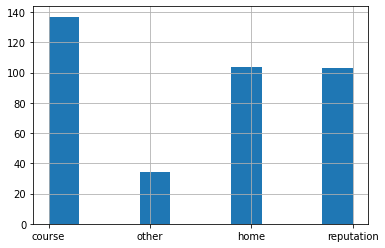

In [38]:
print("""Мы видим, что образовательная программа является ключевой причиной, 
но также не маловажно и близость к дому и репутация школы.""")
stud.reason.hist()

In [39]:
# проверяем данные на пустые значения
empty_r=len(stud.reason[stud.reason.isna()==True])
print('В данной колонке {} пустых значений'.format(empty_r))

В данной колонке 17 пустых значений


Так как три признака из четырех могут являться наиболее вероятными значениями, заполним пустые значения по методу предшествующих, чтобы сохранить соотношение причин

In [40]:
stud.reason.ffill(inplace=True)
stud.reason.value_counts()

course        146
reputation    108
home          105
other          36
Name: reason, dtype: int64

In [41]:
# анализируем колонку "опекун"
stud.guardian.value_counts()

mother    250
father     86
other      28
Name: guardian, dtype: int64

Мы видим, что в значительном большинстве опекуном учащегося является мать


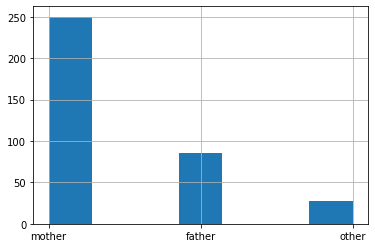

In [42]:
print('Мы видим, что в значительном большинстве опекуном учащегося является мать')
stud.guardian.hist(bins='scott')

In [43]:
# проверяем данные на пустые значения
empty_g=len(stud.guardian[stud.guardian.isna()==True])
print('В данной колонке {} пустое значение'.format(empty_g))

В данной колонке 31 пустое значение


In [44]:
# так как один из вариантов является наиболее вероятным, заполняем пустые значения 'mother'
stud.guardian.fillna('mother', inplace=True)
stud.guardian.value_counts()

mother    281
father     86
other      28
Name: guardian, dtype: int64

In [45]:
#  анализируем время в пути до школы
stud.traveltime.value_counts()

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

Как видим, у большинства учащихся время в пути до школы занимает меньше 15 минут


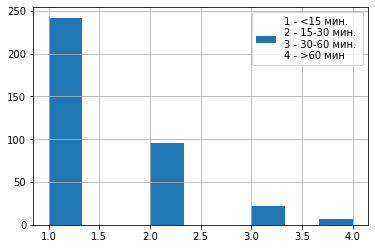

In [46]:
print('Как видим, у большинства учащихся время в пути до школы занимает меньше 15 минут')
stud.traveltime.hist(bins='scott')
plt.legend({'''1 - <15 мин. 
2 - 15-30 мин. 
3 - 30-60 мин. 
4 - >60 мин'''}, loc=1)

In [47]:
# проверяем данные на пустые значения
empty_tt=len(stud.traveltime[stud.traveltime.isna()==True])
print('В данной колонке {} пустых значений'.format(empty_tt))

В данной колонке 28 пустых значений


In [48]:
# так как вариант "до 15 минут" является наиболее вероятным, заполняем пустые значения им
stud.traveltime.fillna(1, inplace=True)
stud.traveltime.value_counts()

1.0    270
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

In [49]:
# анализируем время на учёбу помимо школы в неделю
stud.studytime.value_counts()

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

У большинства учащихся время на учебу занимает от 2 до 5 часов,
хотя также у большого количества учащихся уходит меньше 2 часов


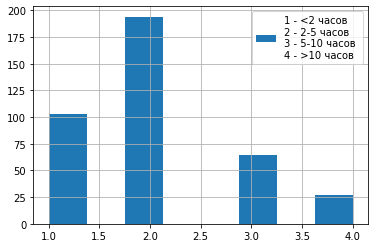

In [50]:
print('''У большинства учащихся время на учебу занимает от 2 до 5 часов,
хотя также у большого количества учащихся уходит меньше 2 часов''')
stud.studytime.hist(bins='scott')
plt.legend({'''1 - <2 часов 
2 - 2-5 часов 
3 - 5-10 часов 
4 - >10 часов'''}, loc=1)

In [51]:
# проверяем данные на пустые значения
empty_st=len(stud.studytime[stud.studytime.isna()==True])
print('В данной колонке {} пустых значений'.format(empty_st))

В данной колонке 7 пустых значений


Учитывая, что пустых значений не так много, высока вероятность, что они будут относиться к самому популярному варианту, поэтому заполним пропуски вариантом "2".

In [52]:
stud.studytime.fillna(2, inplace=True)
stud.studytime.value_counts()

2.0    201
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

In [53]:
# анализируем количество внеучебных неудач 
stud.failures.value_counts()

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

У большинства учащихся количество внеучебных неудач равно 0


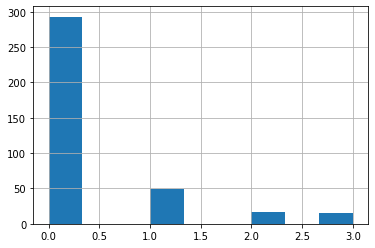

In [54]:
print('''У большинства учащихся количество внеучебных неудач равно 0''')
stud.failures.hist(bins='scott')

In [55]:
# проверяем данные на пустые значения
empty_fail=len(stud.failures[stud.failures.isna()==True])
print('В данной колонке {} пустых значения'.format(empty_fail))

В данной колонке 22 пустых значения


In [56]:
# так как у значительного большинства количество ошибок равно 0
# используем моду для заполнения пустых значений
stud.failures.fillna(0, inplace=True)
stud.failures.value_counts()

0.0    315
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

In [57]:
# анализируем дополнительную образовательную поддержку
stud.schoolsup.value_counts()

no     335
yes     51
Name: schoolsup, dtype: int64

Как видим у значительного большинства учащихся нет дополнительной образовательной поддержки


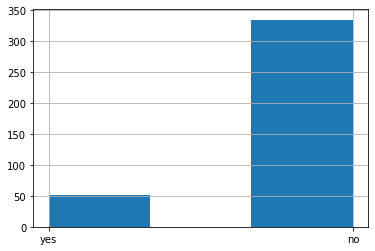

In [58]:
print('Как видим у значительного большинства учащихся нет дополнительной образовательной поддержки')
stud.schoolsup.hist(bins=3)

In [59]:
# проверяем данные на пустые значения
empty_ss=len(stud.schoolsup[stud.schoolsup.isna()==True])
print('В данной колонке {} пустых значений'.format(empty_ss))

В данной колонке 9 пустых значений


In [60]:
# пустых значяений немного и высока вероятность что они примут значение "no"
stud.schoolsup.fillna('no', inplace=True)
stud.schoolsup.value_counts()

no     344
yes     51
Name: schoolsup, dtype: int64

In [61]:
# анализируем семейную образовательную поддержку
stud.famsup.value_counts()

yes    219
no     137
Name: famsup, dtype: int64

Хотя большинству учащихся оказывается семейная образовательная поддержка, 
остается большое количество учащихся, у которых ее нет


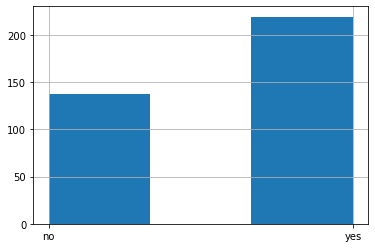

In [62]:
print('''Хотя большинству учащихся оказывается семейная образовательная поддержка, 
остается большое количество учащихся, у которых ее нет''')
stud.famsup.hist(bins=3)

In [63]:
# проверяем данные на пустые значения
empty_fs=len(stud.famsup[stud.famsup.isna()==True])
print('В данной колонке {} пустых значений'.format(empty_fs))

В данной колонке 39 пустых значений


In [64]:
# учитывая что оба варианта ответа могут быть в пропущенных значениях,
# проведем заполнение по методу предшествующего значения
stud.famsup.ffill(inplace=True)
stud.famsup.value_counts()

yes    243
no     152
Name: famsup, dtype: int64

In [65]:
# анализируем дополнительные платные занятия по математике
stud.paid.value_counts()

no     200
yes    155
Name: paid, dtype: int64

Достаточно большое количество учащихся дополнительно платно занимается математикой


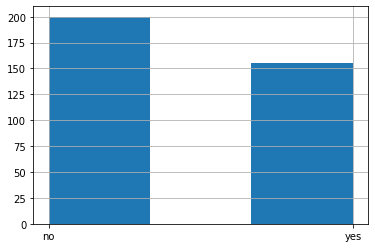

In [66]:
print('Достаточно большое количество учащихся дополнительно платно занимается математикой')
stud.paid.hist(bins=3)

In [67]:
# проверяем данные на пустые значения
empty_paid=len(stud.paid[stud.paid.isna()==True])
print('В данной колонке {} пустых значений'.format(empty_paid))

В данной колонке 40 пустых значений


In [68]:
# заполняем пропуски по методу предшествующего значения,
# поскольку оба варианта возможны
stud.paid.ffill(inplace=True)
stud.paid.value_counts()

no     224
yes    171
Name: paid, dtype: int64

In [69]:
# анализируем дополнительные внеучебные занятия 
stud.activities.value_counts()

yes    195
no     186
Name: activities, dtype: int64

Оба варианта значения колонки практически равнозначны


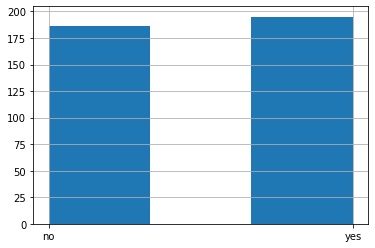

In [70]:
print('Оба варианта значения колонки практически равнозначны')
stud.activities.hist(bins=3)

In [71]:
# проверяем данные на пустые значения
empty_act=len(stud.activities[stud.activities.isna()==True])
print('В данной колонке {} пустых значений'.format(empty_act))

В данной колонке 14 пустых значений


In [72]:
# заполняем пропуски по методу предшествующего значения,
# поскольку оба варианта возможны
stud.activities.ffill(inplace=True)
stud.activities.value_counts()

yes    203
no     192
Name: activities, dtype: int64

In [73]:
# анализируем информацию о посещении детского сада
stud.nursery.value_counts()

yes    300
no      79
Name: nursery, dtype: int64

Значительное большинство учащихся посещали детский сад


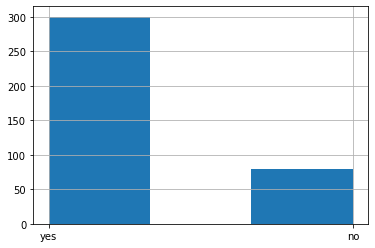

In [74]:
print('Значительное большинство учащихся посещали детский сад')
stud.nursery.hist(bins=3)

In [75]:
# проверяем данные на пустые значения
empty_ns=len(stud.nursery[stud.nursery.isna()==True])
print('В данной колонке {} пустых значений'.format(empty_ns))

В данной колонке 16 пустых значений


In [76]:
# заполняем пропуски по методу предшествующего значения,
# поскольку оба варианта возможны
stud.nursery.ffill(inplace=True)
stud.nursery.value_counts()

yes    312
no      83
Name: nursery, dtype: int64

In [77]:
# анализируем признак granular
stud.granular.value_counts()

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: granular, dtype: int64

Наиболее частое значение -6


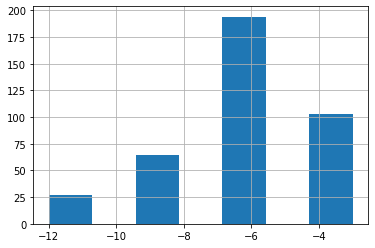

In [78]:
print('Наиболее частое значение -6')
stud.granular.hist(bins=7)

In [79]:
# проверяем данные на пустые значения
empty_gr=len(stud.granular[stud.granular.isna()==True])
print('В данной колонке {} пустых значений'.format(empty_gr))

В данной колонке 7 пустых значений


In [80]:
# заполняем пропуски по методу предшествующего значения,
# поскольку возможны разные варианты
stud.granular.ffill(inplace=True)
stud.granular.value_counts()

-6.0     197
-3.0     104
-9.0      67
-12.0     27
Name: granular, dtype: int64

In [81]:
# анализируем желание получить высшее образование
stud.higher.value_counts()

yes    356
no      19
Name: higher, dtype: int64

Очевидно, что практически каждый учащийся желает получить высшее образование


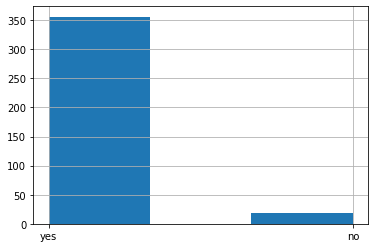

In [82]:
print('Очевидно, что практически каждый учащийся желает получить высшее образование')
stud.higher.hist(bins=3)

In [83]:
# проверяем данные на пустые значения
empty_hi=len(stud.higher[stud.higher.isna()==True])
print('В данной колонке {} пустых значений'.format(empty_hi))

В данной колонке 20 пустых значений


In [84]:
# заполняем пропуски модой,
stud.higher.fillna('yes', inplace=True)
stud.higher.value_counts()

yes    376
no      19
Name: higher, dtype: int64

In [85]:
# анализируем наличие интернета
stud.internet.value_counts()

yes    305
no      56
Name: internet, dtype: int64

У большинства учащихся есть интернет


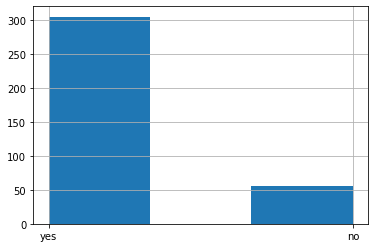

In [86]:
print('У большинства учащихся есть интернет')
stud.internet.hist(bins=3)

In [87]:
# проверяем данные на пустые значения
empty_int=len(stud.internet[stud.internet.isna()==True])
print('В данной колонке {} пустых значения'.format(empty_int))

В данной колонке 34 пустых значения


In [88]:
# заполняем пропуски модой
stud.internet.fillna('yes', inplace=True)
stud.internet.value_counts()

yes    339
no      56
Name: internet, dtype: int64

In [89]:
# анализируем состоят ли учащиеся в романтических отношениях
stud.romantic.value_counts()

no     240
yes    124
Name: romantic, dtype: int64

Романтические отношения есть у двух третей учащихся


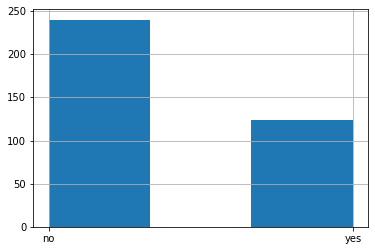

In [90]:
print('Романтические отношения есть у двух третей учащихся')
stud.romantic.hist(bins=3)

In [91]:
# проверяем данные на пустые значения
empty_rom=len(stud.romantic[stud.romantic.isna()==True])
print('В данной колонке {} пустое значение'.format(empty_rom))

В данной колонке 31 пустое значение


In [ ]:
# заполняем пропуски по методу предшествующего значения,
# поскольку оба варианта возможны
stud.romantic.ffill(inplace=True)
stud.romantic.value_counts()

In [92]:
# анализируем семейные отношения
stud.famrel.value_counts()

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

25-й перцентиль: 4.0, 75-й перцентиль: 5.0, IQR: 1.0,  Границы выбросов: [2.5, 6.5].


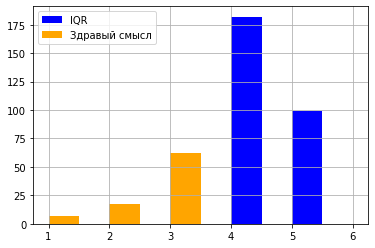

In [113]:
# анализируем выброс
IQR = stud.famrel.quantile(0.75) - stud.famrel.quantile(0.25)
perc25 = stud.famrel.quantile(0.25)
perc75 = stud.famrel.quantile(0.75)

print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.famrel.loc[stud.famrel.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins = 4, range = (4, 6), 
                        label = 'IQR', color='blue')
 
stud.famrel.loc[stud.famrel.between(0, 3)].hist(
    bins = 10, range = (1, 6), label = 'Здравый смысл', 
    color='orange')
 
plt.legend();

Мы видим, что есть выброс по одной строке можно предположить, что "-" указали ошибочно, но т.к. этого мы не знаем проведем замену на моду

In [114]:
stud.famrel[stud.famrel==-1]=4

<ipython-input-114-fcd7b340fd7f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.famrel[stud.famrel==-1]=4


In [115]:
# проверяем данные на пустые значения
empty_fr=len(stud.famrel[stud.famrel.isna()==True])
print('В данной колонке {} пустых значений'.format(empty_fr))

В данной колонке 27 пустых значений


In [116]:
# проведем замену пропусков на моду
stud.famrel.fillna(4, inplace=True)
stud.famrel.value_counts()

4.0    210
5.0     99
3.0     62
2.0     17
1.0      7
Name: famrel, dtype: int64

In [117]:
# анализируем свободное время после школы
stud.freetime.value_counts()

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

count    384.000000
mean       3.231771
std        0.993940
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

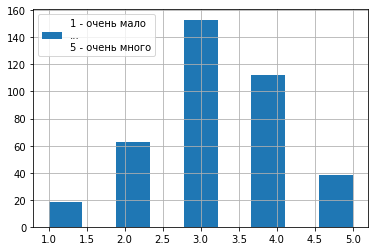

In [118]:
# проанализируем  распределние значений признака по гистограмме
stud.freetime.hist(bins=9)
plt.legend({'''1 - очень мало\n...\n5 - очень много'''}, loc=2)
stud.freetime.describe()

In [119]:
# проверяем данные на пустые значения
empty_ft=len(stud.freetime[stud.freetime.isna()==True])
print('В данной колонке {} пустых значений'.format(empty_ft))

В данной колонке 11 пустых значений


In [120]:
# заполняем пропуски по методу предшествующего значения,
# поскольку возможны разные варианты
stud.freetime.ffill (inplace=True)
stud.freetime.value_counts()

3.0    157
4.0    114
2.0     68
5.0     38
1.0     18
Name: freetime, dtype: int64

In [121]:
# анализируем проведение времени с друзьями
stud.goout.value_counts()

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

count    387.000000
mean       3.105943
std        1.115896
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

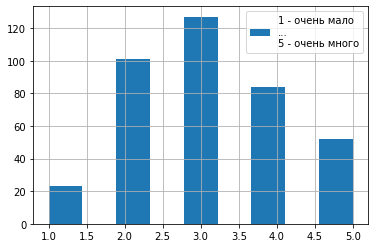

In [122]:
stud.goout.hist(bins=9)
plt.legend({'''1 - очень мало\n...\n5 - очень много'''}, loc=1)
stud.goout.describe()

In [123]:
# проверяем данные на пустые значения
empty_go=len(stud.goout[stud.goout.isna()==True])
print('В данной колонке {} пустых значений'.format(empty_go))

В данной колонке 8 пустых значений


In [124]:
# заполняем пропуски по методу предшествующего значения,
# поскольку возможны разные варианты
stud.goout.ffill (inplace=True)
stud.goout.value_counts()

3.0    128
2.0    104
4.0     84
5.0     55
1.0     24
Name: goout, dtype: int64

In [125]:
# анализируем текущее состояние здоровья 
stud.health.value_counts()

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

count    380.000000
mean       3.531579
std        1.396019
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

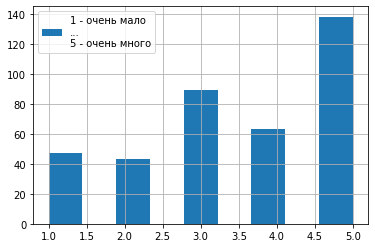

In [126]:
stud.health.hist(bins=9)
plt.legend({'''1 - очень мало\n...\n5 - очень много'''}, loc=2)
stud.health.describe()

In [127]:
# проверяем данные на пустые значения
empty_health=len(stud.health[stud.health.isna()==True])
print('В данной колонке {} пустых значений'.format(empty_health))

В данной колонке 15 пустых значений


In [128]:
# заполняем пропуски по методу предшествующего значения,
# поскольку возможны разные варианты
stud.health.ffill (inplace=True)
stud.health.value_counts()

5.0    141
3.0     91
4.0     66
1.0     51
2.0     46
Name: health, dtype: int64

In [129]:
# анализируем данные по количеству пропущенных занятий
print('Количество уникальных значений =', stud.absences.nunique())

Количество уникальных значений = 36


In [162]:
stud.absences.value_counts()

0.0     125
2.0      60
4.0      53
6.0      31
8.0      21
10.0     17
14.0     12
12.0     12
3.0       8
16.0      7
7.0       6
5.0       5
18.0      5
20.0      4
1.0       3
22.0      3
9.0       3
15.0      2
13.0      2
11.0      2
54.0      1
25.0      1
17.0      1
26.0      1
56.0      1
23.0      1
28.0      1
21.0      1
75.0      1
30.0      1
19.0      1
38.0      1
40.0      1
24.0      1
Name: absences, dtype: int64

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

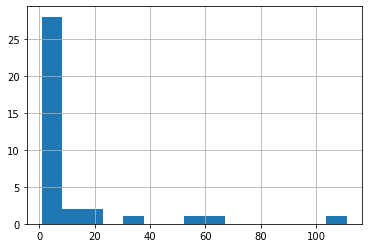

In [139]:
stud.absences.value_counts().hist(bins=15)
stud.absences.describe()

На основании статистических описаний показателя, мы видим, что среднее значение пропусков составляет 7,28, но также видно, что сильно сдвинуто макимальное значение. И стандартное отклонение показывает, что в данных очень большой разброс в значениях, поэтому мы не можем доверять среднему значению.
Дополнительно проверим моду и медиану.

In [140]:
print('Медиана равна', stud.absences.median())
print('Самое распространенное количество пропусков равно', stud.absences.value_counts().index[0])

Медиана равна 4.0
Самое распространенное количество пропусков равно 0.0


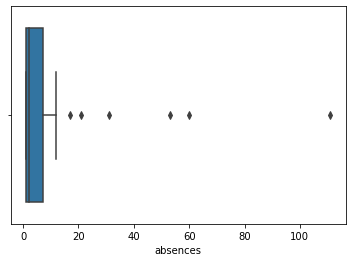

In [141]:
# на основании боксплота можно сделать выводы о наличии выбросов
absen=stud.absences.value_counts()
sns.boxplot(absen)

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


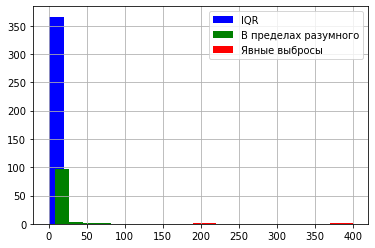

In [155]:
# анализируем выброс
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)

print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
 
stud.absences.loc[stud.absences.between(
perc25 - 1.5*IQR,
perc75 + 1.5*IQR)].hist(bins=1, range=(0,20),
                        label = 'IQR', color='blue')
 
stud.absences.loc[stud.absences.between(8,100)].hist(bins=5, range=(8,100),
                                        label = 'В пределах разумного', 
                                        color='green')
stud.absences.loc[stud.absences>100].hist(bins=10, range=(100,400),
                                        label = 'Явные выбросы', 
                                        color='red')
plt.legend();

In [156]:
# отберем значения, которые выглядят как выбросы
stud.absences[stud.absences>100]

222    385.0
390    212.0
Name: absences, dtype: float64

Как видим два значения по пропускам сильно отличаются, например, количество пропусков 385 превышает количество дней в году,
а если брать количество дней в учебном году, тогда такие значения выглядят крайне странными, поэтому мы проведем замену в этих строках на наиболее вероятный вариант 0.

In [157]:
stud.absences[stud.absences==385]=0
stud.absences[stud.absences==212]=0

<ipython-input-157-5510ca933a6d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.absences[stud.absences==385]=0
<ipython-input-157-5510ca933a6d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stud.absences[stud.absences==212]=0


In [158]:
# проверяем данные на пустые значения
empty_abs=len(stud.absences[stud.absences.isna()==True])
print('В данной колонке {} пустых значений'.format(empty_abs))

В данной колонке 12 пустых значений


In [159]:
# также проведем замену пропусков на 0
stud.fillna(0, inplace=True)

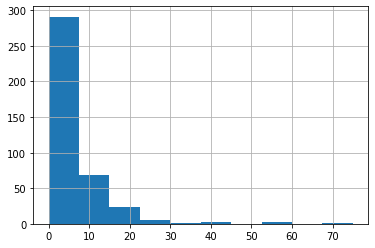

In [160]:
# проверим как изменилась гистограмма распределения значений
stud.absences.hist(bins=10)

In [161]:
# анализируем баллы по госэкзамену по математике
stud.score.value_counts()

50.0     54
55.0     46
0.0      43
75.0     33
65.0     31
40.0     31
60.0     31
70.0     27
45.0     27
80.0     16
30.0     15
90.0     12
35.0      9
25.0      7
85.0      6
95.0      5
100.0     1
20.0      1
Name: score, dtype: int64

count    395.000000
mean      51.468354
std       23.627199
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

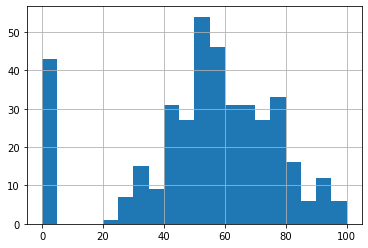

In [163]:
# крайне странно выглядят баллы равные 0 у значительного количества учащихся
# возможно их балы за экзамен не были учтены по какой-то причине
stud.score.hist(bins=20)
stud.score.describe()

In [165]:
# выявим самое популярное количество балов и медиану
print('Медиана равна', stud.score.median())
print('Самое распространенное количество балов равно', stud.score.value_counts().index[0])

Медиана равна 55.0
Самое распространенное количество балов равно 50.0


# Проведем анализ количественных показателей

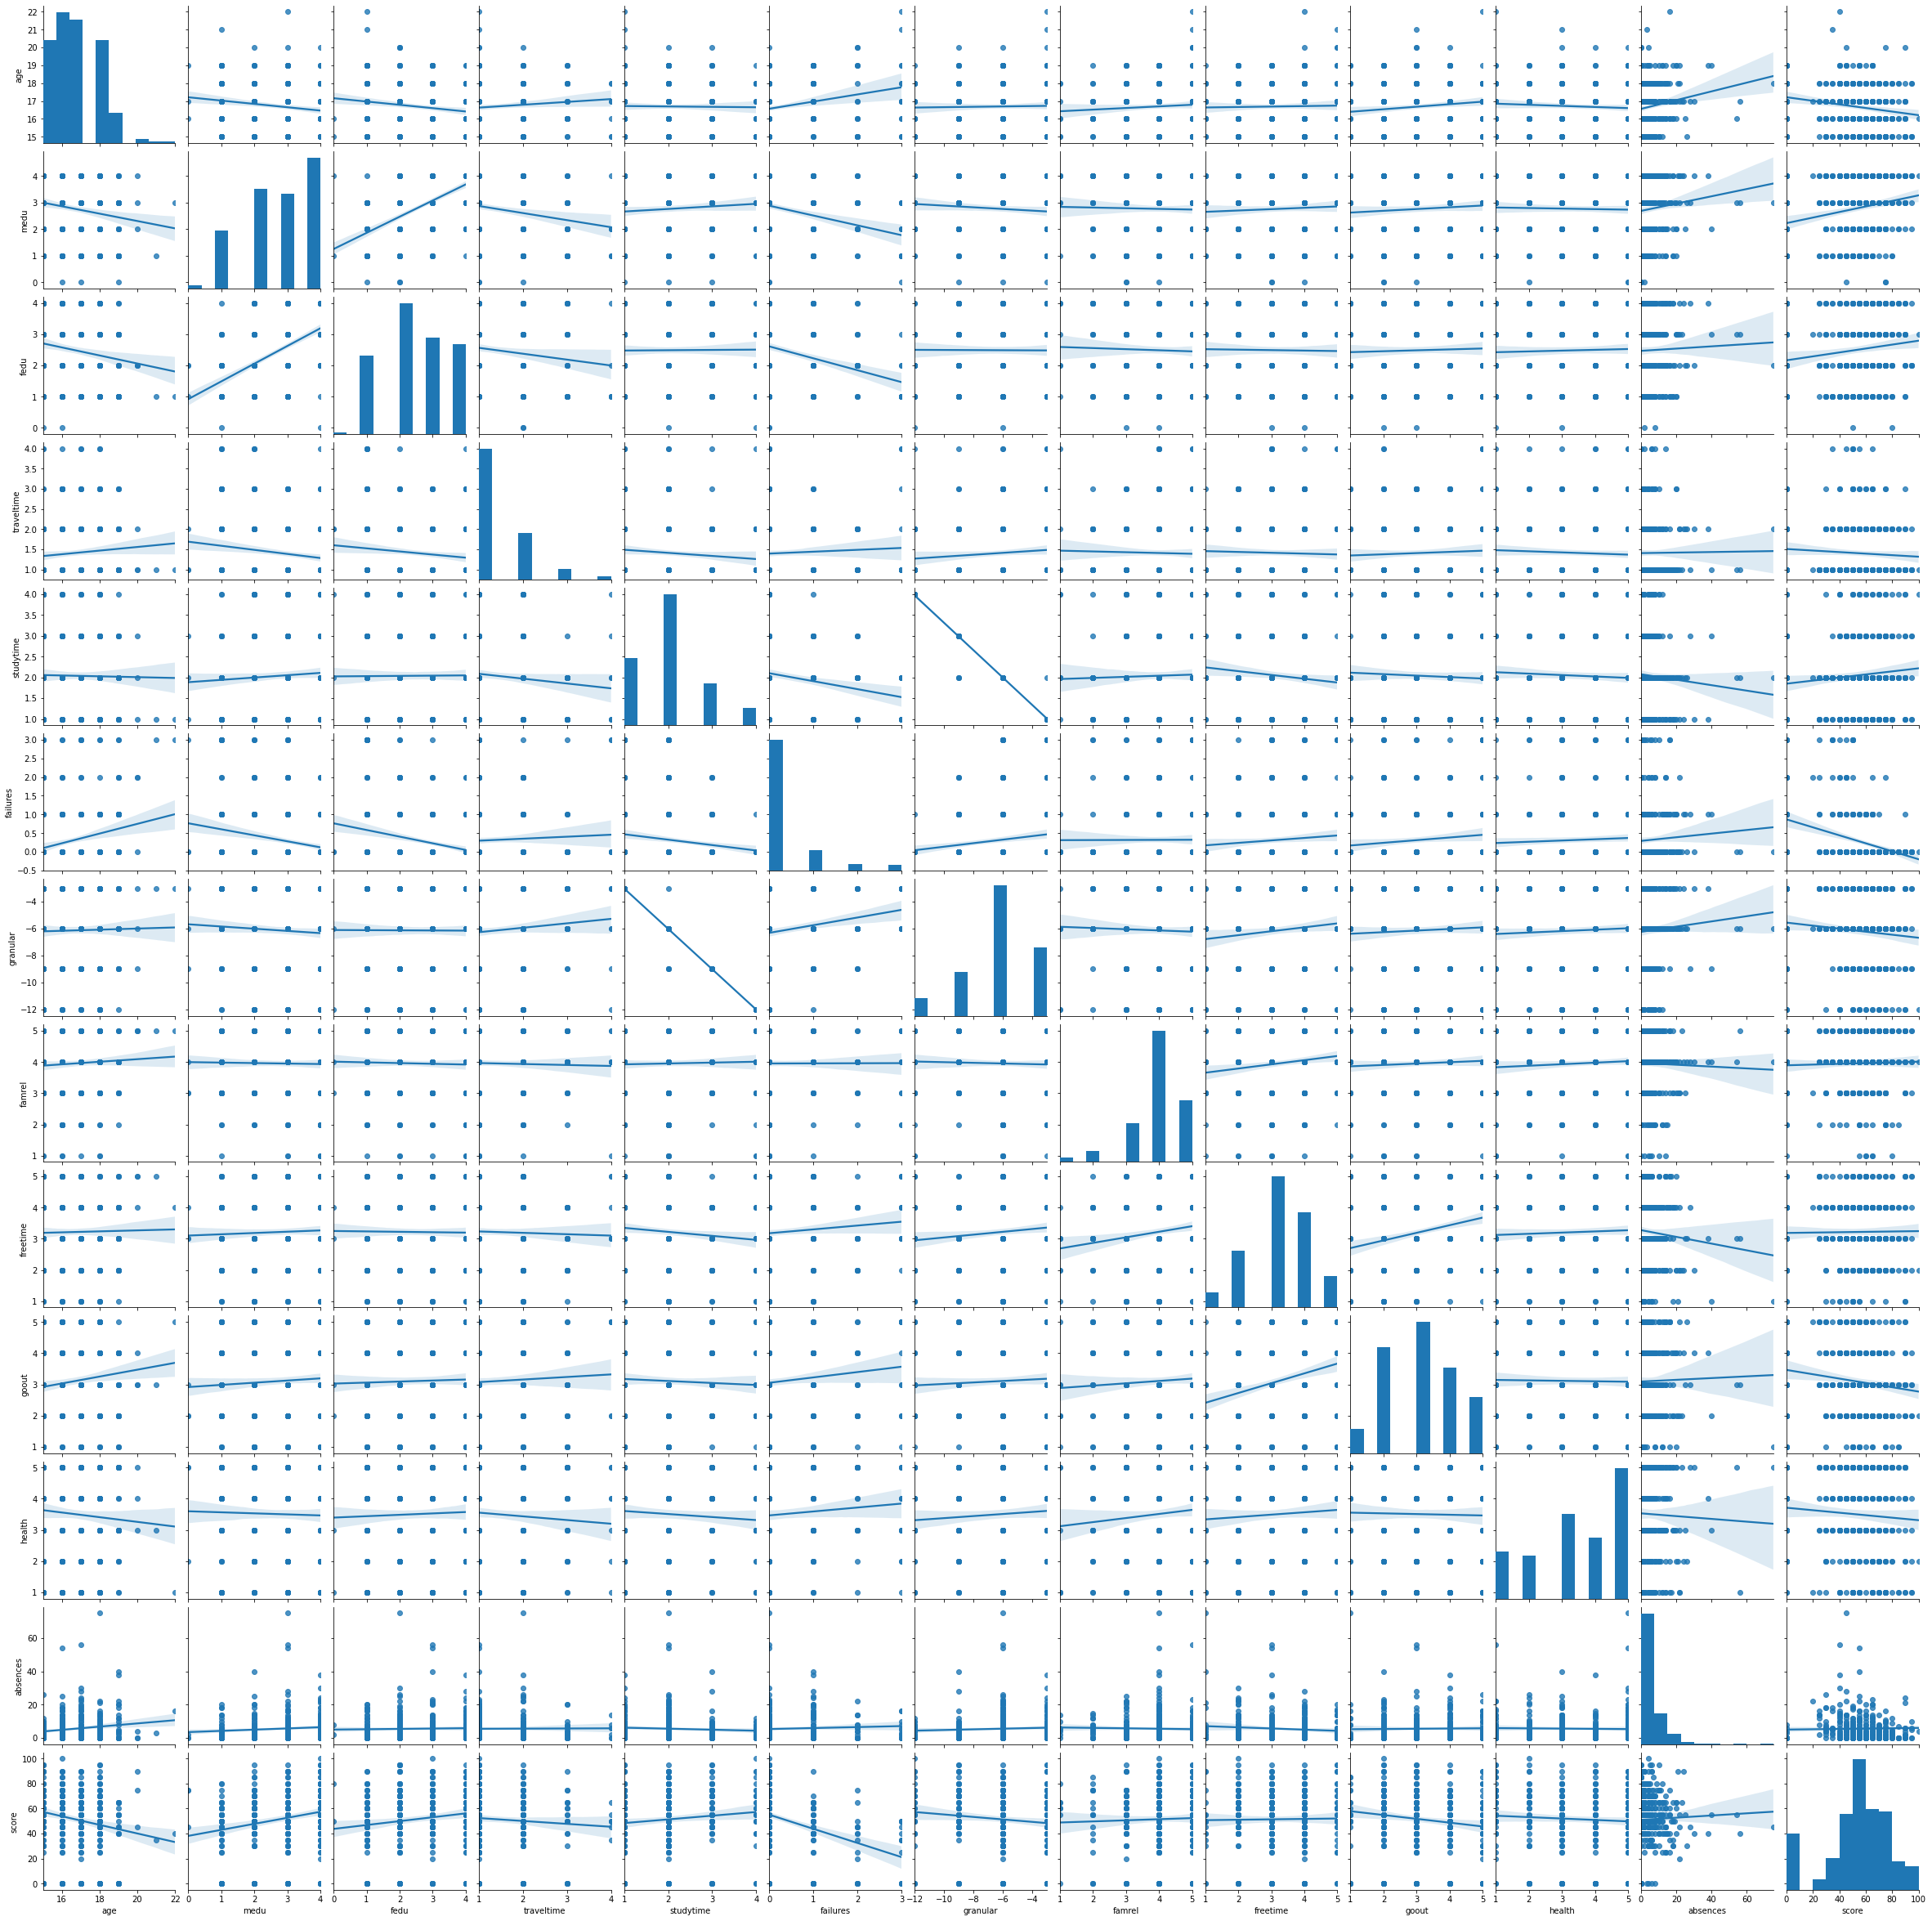

In [167]:
sns.pairplot(stud, kind='reg')

Графики в таком виде не сильно информативны, единственное что сразу бросается в глаза это почти полная корреляция показателей stydytime и studytime, granular. Что касается баллов по математике, то можно отметить связсь с gout, failures, medu, fedu.
Важным моментом является то, что многие числовые показатели на самом деле имеют категориальные значения, поэтому анализировать  их таким образом является не совсем точным.

In [169]:
# сравним расчитанную корреляцию по Пирсону
stud.corr()

,age,medu,fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.160777,-0.154781,0.084755,-0.015355,0.228081,0.020911,0.061386,0.020316,0.124994,-0.068250,0.154023,-0.186365
medu,-0.160777,1.000000,0.587159,-0.164282,0.073607,-0.243821,-0.071671,-0.019683,0.045837,0.067872,-0.026109,0.099946,0.224698
fedu,-0.154781,0.587159,1.000000,-0.120629,0.007754,-0.260690,-0.004937,-0.028487,-0.013983,0.030946,0.033621,0.027129,0.139851
traveltime,0.084755,-0.164282,-0.120629,1.000000,-0.094637,0.049670,0.088708,-0.024643,-0.030385,0.049438,-0.057258,0.007916,-0.066719
studytime,-0.015355,0.073607,0.007754,-0.094637,1.000000,-0.166598,-0.992805,0.027181,-0.108175,-0.047521,-0.057529,-0.063066,0.104641
failures,0.228081,-0.243821,-0.260690,0.049670,-0.166598,1.000000,0.163940,0.003015,0.090124,0.110501,0.065136,0.053678,-0.347599
granular,0.020911,-0.071671,-0.004937,0.088708,-0.992805,0.163940,1.000000,-0.030826,0.114845,0.053127,0.059306,0.061534,-0.105459
famrel,0.061386,-0.019683,-0.028487,-0.024643,0.027181,0.003015,-0.030826,1.000000,0.154609,0.057459,0.080040,-0.027318,0.032043
freetime,0.020316,0.045837,-0.013983,-0.030385,-0.108175,0.090124,0.114845,0.154609,1.000000,0.277047,0.053637,-0.087210,0.013947
goout,0.124994,0.067872,0.030946,0.049438,-0.047521,0.110501,0.053127,0.057459,0.277047,1.000000,-0.018063,0.019697,-0.145647


In [170]:
# учитывая, что для категориальных признаков, лучше использовать формулу Спирмана, попробуем сравнить расчеты
stud.corr(method='spearman')

,age,medu,fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.158046,-0.140802,0.120110,0.019468,0.223336,-0.012817,0.040105,0.000989,0.140436,-0.083638,0.119539,-0.185847
medu,-0.158046,1.000000,0.593225,-0.136335,0.073857,-0.242153,-0.070549,-0.002235,0.048245,0.067436,-0.015685,0.103556,0.225540
fedu,-0.140802,0.593225,1.000000,-0.109319,0.036273,-0.245588,-0.032407,-0.013214,-0.016065,0.036540,0.028591,-0.005390,0.153990
traveltime,0.120110,-0.136335,-0.109319,1.000000,-0.097517,0.034541,0.092065,-0.036237,-0.042735,0.030320,-0.080687,0.008889,-0.074681
studytime,0.019468,0.073857,0.036273,-0.097517,1.000000,-0.152316,-0.991432,0.053795,-0.093413,-0.048645,-0.077143,-0.042722,0.113292
failures,0.223336,-0.242153,-0.245588,0.034541,-0.152316,1.000000,0.146857,-0.006406,0.090828,0.096844,0.090830,0.076710,-0.353112
granular,-0.012817,-0.070549,-0.032407,0.092065,-0.991432,0.146857,1.000000,-0.058075,0.099926,0.056090,0.077689,0.034480,-0.113012
famrel,0.040105,-0.002235,-0.013214,-0.036237,0.053795,-0.006406,-0.058075,1.000000,0.146489,0.056831,0.059708,-0.056250,0.045160
freetime,0.000989,0.048245,-0.016065,-0.042735,-0.093413,0.090828,0.099926,0.146489,1.000000,0.274717,0.068374,-0.009658,0.003510
goout,0.140436,0.067436,0.036540,0.030320,-0.048645,0.096844,0.056090,0.056831,0.274717,1.000000,-0.028497,0.096544,-0.173044


Можно сказать, что для категориальных показателей (таких как fedu, goout) расчет корреляции по Спирману более точен, а для истинно числовых показателей (например absences) лучше ориентироваться на расчет корреляции по Пирсону.

## Предварительные выводы
Выявлена значимая отрицательная корреляция между балами по математике и количеством внеучебных неудач, т.е. чем меньше неудач, тем выше балл по математике и наоборот.

Также значимая положительная корреляция отмечена между баллами по математике и образованием родителей, причем образование матери играет большую роль, чем образование отца. 

Также следует отметить отрицательную корреляцию балов по математике с возростом (т.е. чем старше учащийся, тем ниже бал), с проведением времени с друзьями (т.е. чем больше времени учащийся проводит с друзьями, тем меньше бал по математике). 

Отдельно стоит отметить такие показатели как время на учебу помимо школы и studytime, granular которые также имеют высокие показатели корреляции (хотя возможно и не столь значимые). Между собой их корреляция практически равна единице, т.е. они равнозначны (только имеют противоположную направленность). Поэтому можно исключить один из показателей, учитывая более высокую отрицательную корреляцию granular, можно оставить его для дальнейшего анализа.

На основании полученных результатов, мы можем точно исключить из анализа следующие показатели:
- absences 
- health 
- freetime
- famrel 
- studytime 
- traveltime 

Они имеют крайне слабую связь с баллами по математике

# Проведем анализ номинативных показателей

In [172]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', data=stud, ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

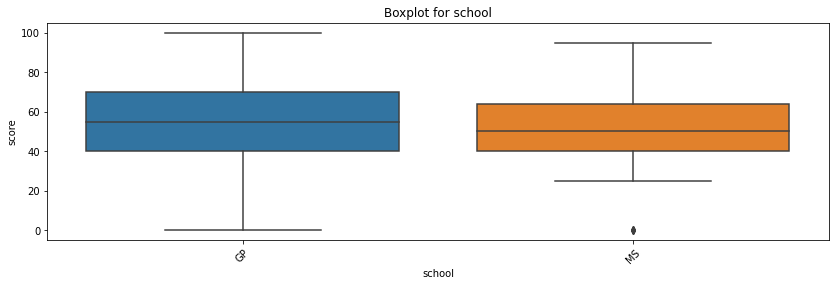

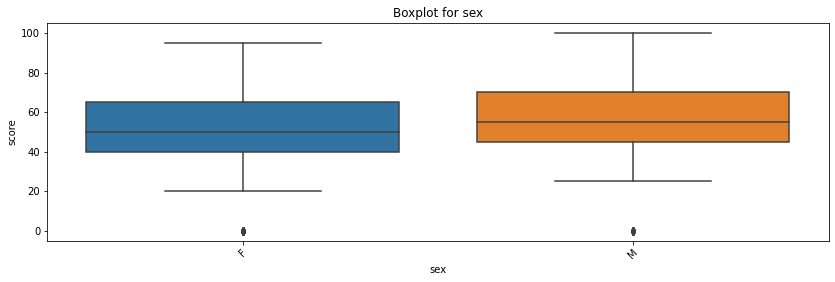

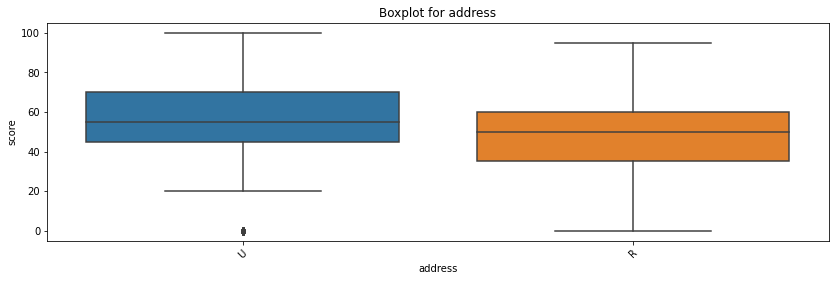

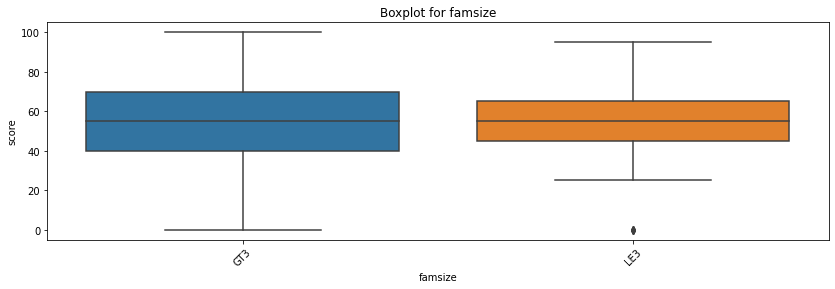

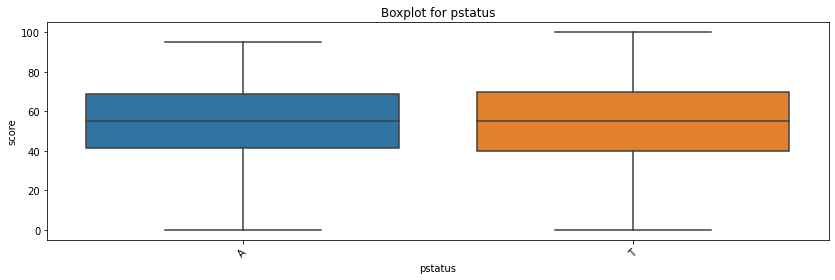

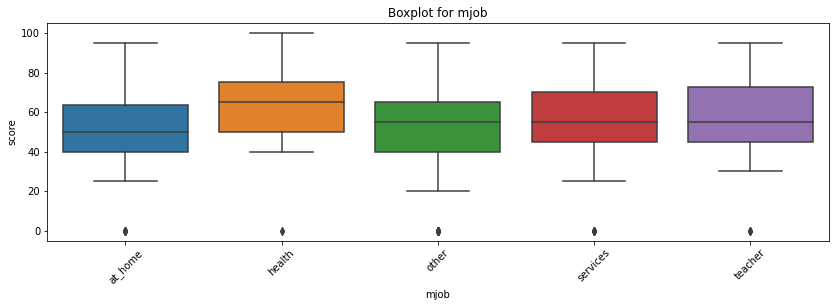

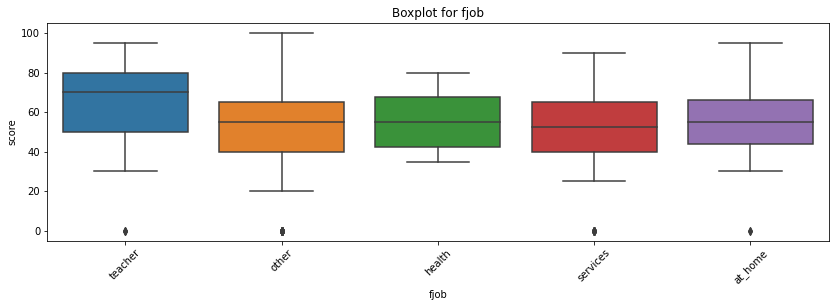

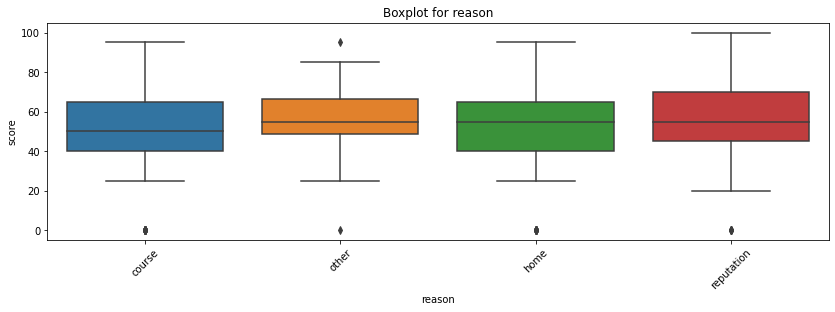

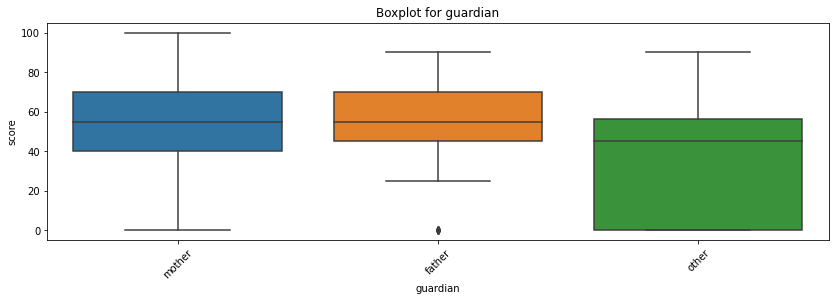

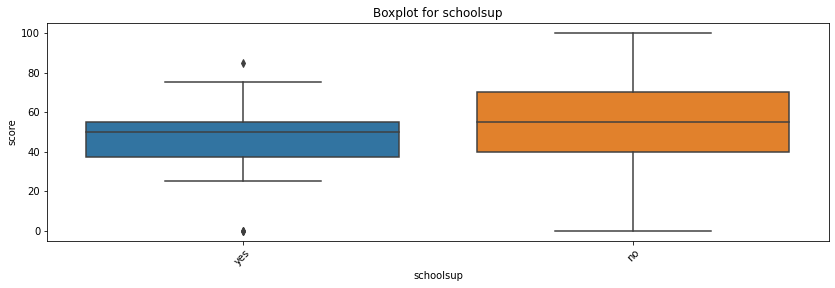

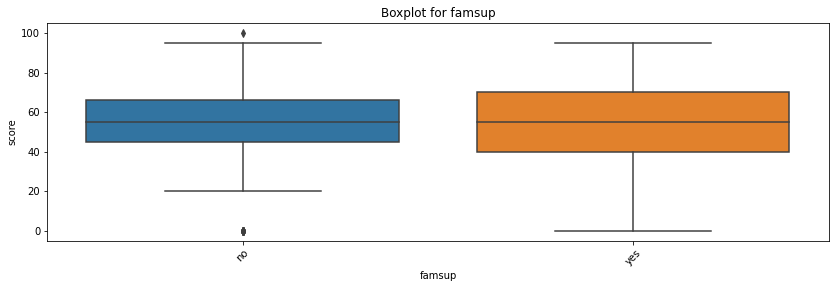

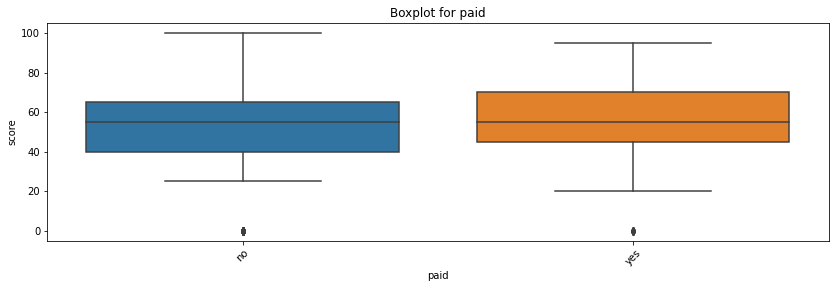

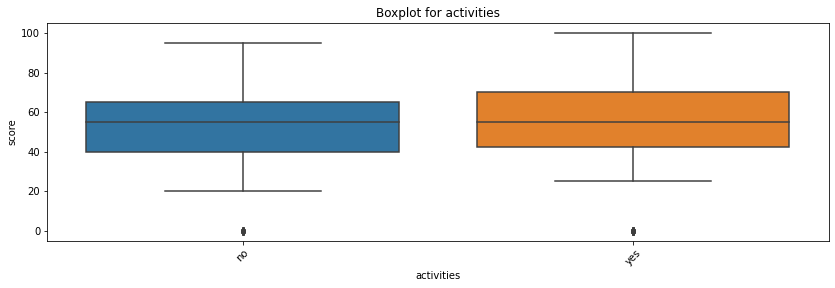

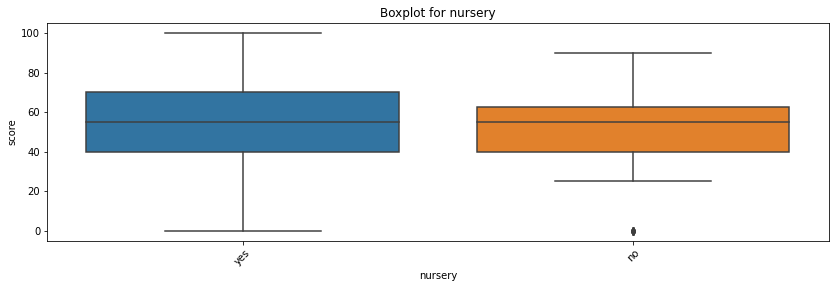

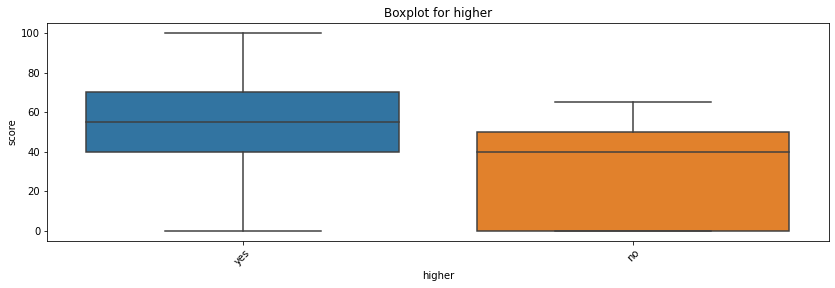

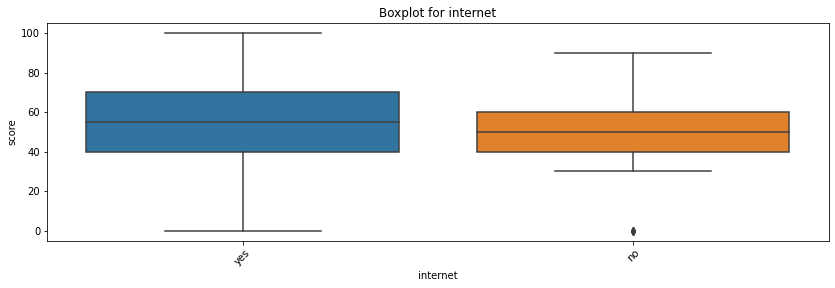

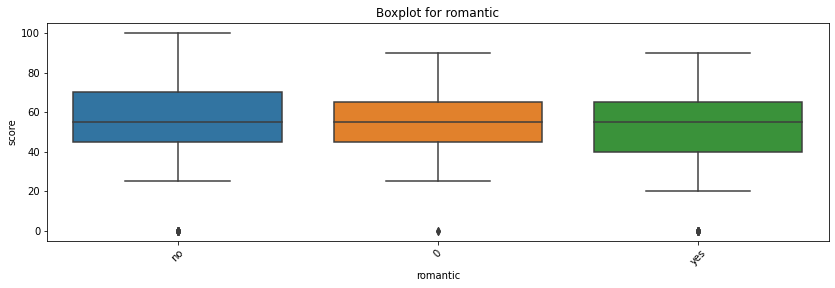

In [173]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus',
            'mjob', 'fjob', 'reason', 'guardian', 
            'schoolsup', 'famsup', 'paid', 'activities', 
            'nursery', 'higher', 'internet', 'romantic']:
    get_boxplot(col)

Учитывая, что многие количественные показатели датасета, это скрытые номинативные показатели, посмротрим на отличие в баллах по математике для разных значений таких показателей.

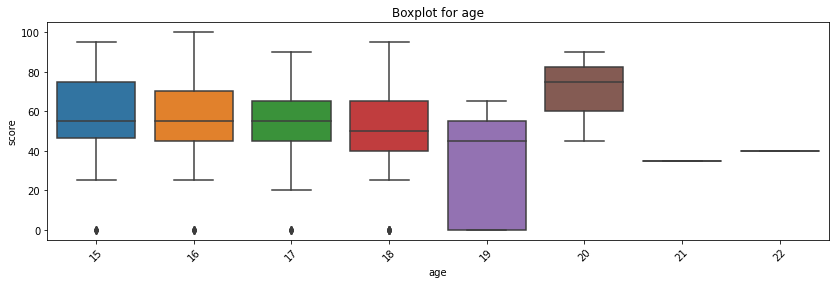

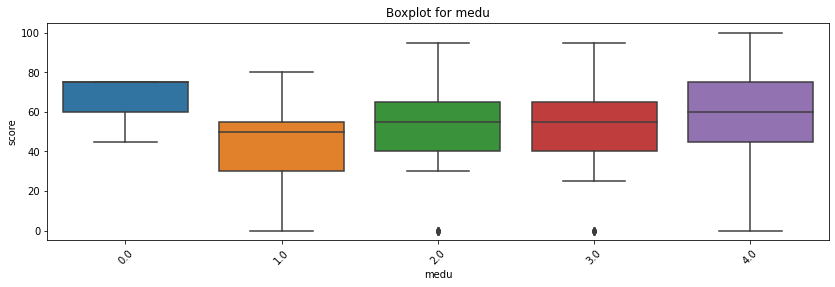

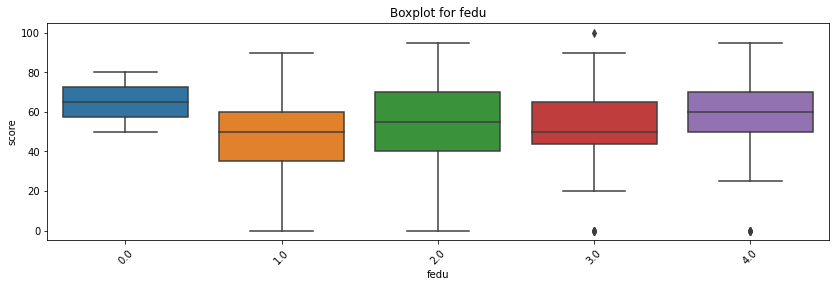

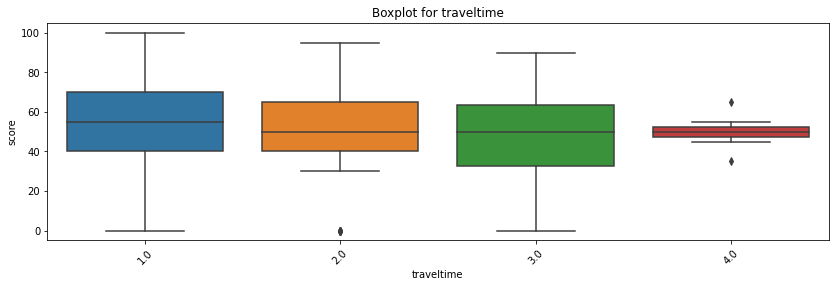

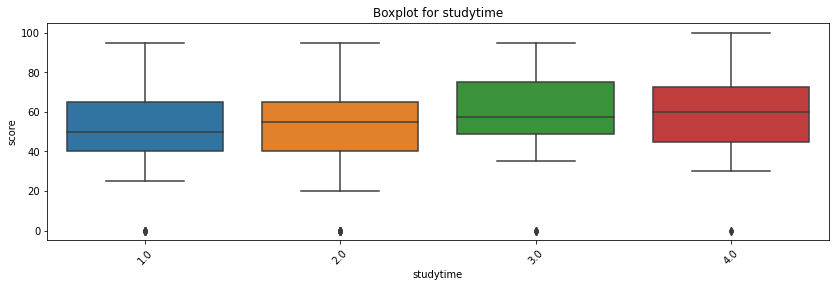

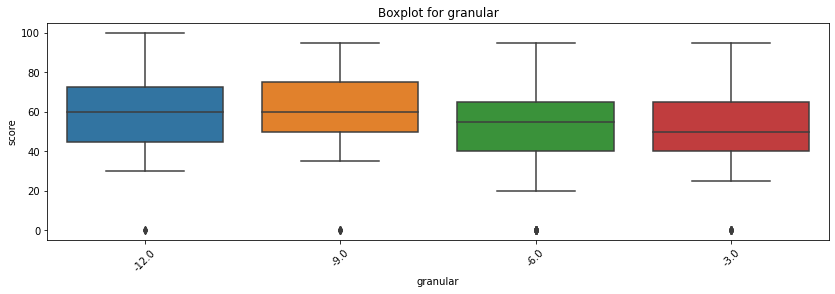

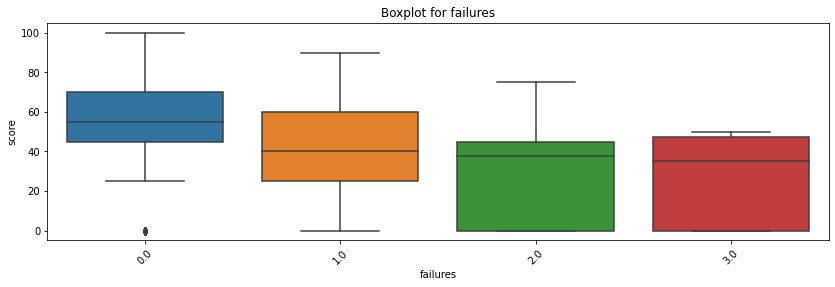

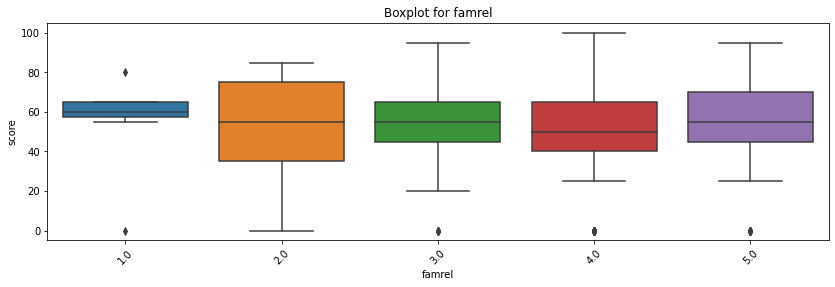

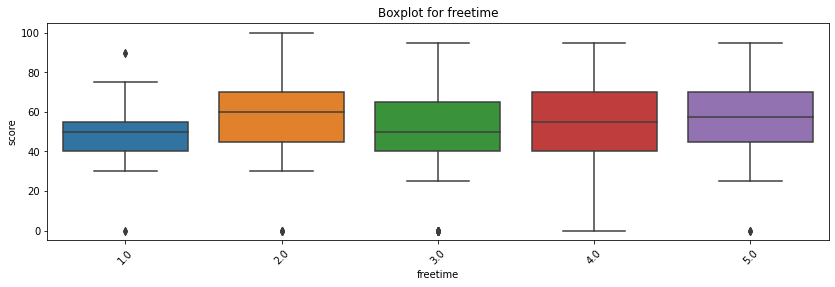

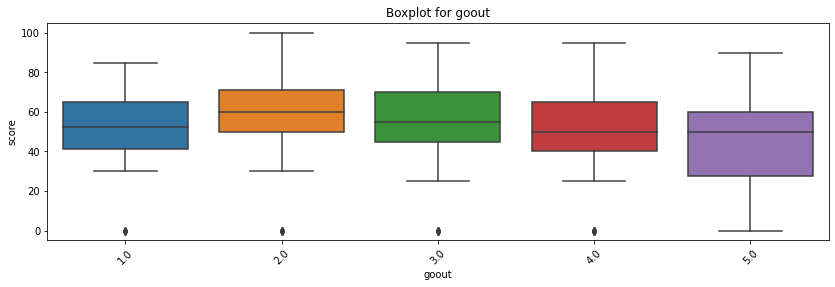

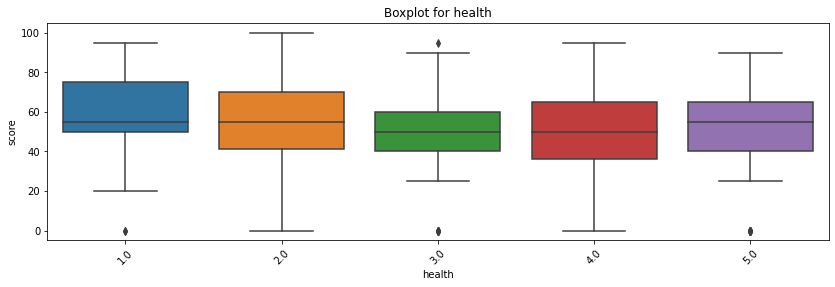

In [176]:
for col in ['age', 'medu', 'fedu', 'traveltime', 'studytime', 'granular',
            'failures', 'famrel', 'freetime', 'goout', 'health' ]:
    get_boxplot(col)

In [174]:
def get_stat_dif(column):
    study = stud.loc[:, column].value_counts().index
    combinations_all = list(combinations(study, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [175]:
for col in ['school', 'sex', 'address', 'famsize', 'pstatus',
            'mjob', 'fjob', 'reason', 'guardian', 
            'schoolsup', 'famsup', 'paid', 'activities', 
            'nursery', 'higher', 'internet', 'romantic']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки sex
Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки mjob
Найдены статистически значимые различия для колонки guardian
Найдены статистически значимые различия для колонки schoolsup
Найдены статистически значимые различия для колонки higher


In [177]:
for col in ['age', 'medu', 'fedu', 'traveltime', 'studytime', 'granular',
            'failures', 'famrel', 'freetime', 'goout', 'health' ]:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки age
Найдены статистически значимые различия для колонки medu
Найдены статистически значимые различия для колонки fedu
Найдены статистически значимые различия для колонки failures
Найдены статистически значимые различия для колонки goout


## Предварительные выводы
Таким образом из анализа можно исключить следующие показатели:
- school
- famsize
- pstatus
- fjob
- reason
- famsup
- paid
- activities
- nursery
- internet

# Выводы


1. В датасете дастаточно много пропусков, максимальное количество пропусков по одной из колонок составляет 11%. Если удалять все пропуски, то датасет потярет большую часть своих данных. Поэтому проводилась замена пропусков в зависимости от типа данных.

2. Выбросы были найдены только в трех колонках (absences, famrel, fedu) из тридцати. Так как общее количество строк не большое проводилась замена выбросов по аналогии с пропусками.

3. Наиболее значимая корреляция была выявлена между количеством внеучебных неудач и баллами по математике. Это может говорить как о том, что жизненные неудачи мешают изучению математике, например, им не хватает времени, так и о том что полученный негативный опыт отрицательно сказывается на способности изучать математику.Чтобы более точно сформулировать выводы, необходимо понять каким образом собирались данные по этому показателю.

4. Наиболее важные показатели между которыми выявлена связь с баллами по математике, либо найдены значимые статистические различия это:
  - failures 
  - sex
  - address
  - mjob
  - guardian
  - schoolsup
  - higher
  - romantic
 
 Данные показатели рекомендуется использовать для построения модели.
 
5. Также была выявлена связь, близкая к умеренной (но статистически слабая) у следующих показателей:
  - medu
  - fedu
  - age 
  - goout
  - studytime, granular
 
 Учитывая количество пропусков, которое было в датасете, возможно если собрать и доготовить данные более качественно, их можно будет тоже использовать в модели.
 
 PS. Чтобы наше исследование не было сексистским, можно исключить из анализа показатель sex. По такому же принципу можно рассматривать и показатель age, тем более что цель проекта помогать учащимся на ранней стадии.

### Примечание для ментора: 

Установить autopep8 не получилось.

Предполагаю что сам анализ должен был выглядить короче, и не должен был проводиться пошаговый анализ каждой колонки. А основываясь на типе данных надо было циклом применить анализ сразу на несколько колонок, также как и провести замену данных. Но так как делала анализ впервые и не была уверена что и для чего делаю, проводила обработку колонок поочередно. Ну и после проделанной работы, оставить только укороченный вариант было жалко. 

Также возникли (и остались) сложности в понимании того, какие колонки стоит использовать для модели, а какие нет. Т.е. как понять какая связь (корреляция) оказывает значимое влияние на ключевой признак.
И еще хотелось бы узнать мнение(совет) имеет ли смысл числовой формат float у скрытых категориальных показателей менять на integer. (Расчеты не меняются.)
Ну и главное, как проверять связь с ключевым показателем категориальных показателей, либо использовать числовой расчет корреляции или же анализировать значимое отличие в распределении баллов в зависимости от значения проверяемого показателя.